In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import datetime
%matplotlib inline
np.set_printoptions(suppress=True)

In [98]:
spend = pd.read_csv("spend.csv")
count = pd.read_csv("counts.csv")
spend['date'] = pd.to_datetime(spend['date'],unit='s')
count['date'] = pd.to_datetime(count['date'])
print spend.describe()
print spend.info()
print count.describe()
print count.info()

         amount
count    1.934M
mean    301.837
std      1.122k
min    -605.167
25%      15.327
50%      66.135
75%     234.994
max    307.370k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934135 entries, 0 to 1934134
Data columns (total 3 columns):
account    object
date       datetime64[ns]
amount     float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 44.3+ MB
None
        count
count  1.934M
mean   41.459
std    74.995
min    10.000
25%    15.000
50%    24.000
75%    44.000
max    5.643k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934028 entries, 0 to 1934027
Data columns (total 3 columns):
account    object
date       datetime64[ns]
count      int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 44.3+ MB
None


In [99]:
spend['new_date'] = [d.date() for d in spend['date']]
spend['new_time'] = [d.time() for d in spend['date']]
print spend.head()
count['new_date'] = [d.date() for d in count['date']]
print count.head()

                            account                date   amount    new_date  \
0  5e0a5eb5575517efdddb2799c90e2e9b 2017-08-16 00:00:00   15.144  2017-08-16   
1  a04e063493c55bc6cecd9056712e9e47 1973-04-05 07:06:40  730.070  1973-04-05   
2  ff6cc8cadcb7457f9ddb2dd238a13733 2017-08-16 00:00:00   3.651k  2017-08-16   
3  324a05f1f917b8a0af83a54e55a1ef63 2017-08-16 00:00:00  113.219  2017-08-16   
4  b9abff45dc08172b556cb10b7c3c2252 2017-08-16 00:00:00  697.224  2017-08-16   

   new_time  
0  00:00:00  
1  07:06:40  
2  00:00:00  
3  00:00:00  
4  00:00:00  
                            account       date  count    new_date
0  5e0a5eb5575517efdddb2799c90e2e9b 2017-08-16     56  2017-08-16
1  a04e063493c55bc6cecd9056712e9e47 2017-08-16    180  2017-08-16
2  ff6cc8cadcb7457f9ddb2dd238a13733 2017-08-16    432  2017-08-16
3  324a05f1f917b8a0af83a54e55a1ef63 2017-08-16     50  2017-08-16
4  b9abff45dc08172b556cb10b7c3c2252 2017-08-16    135  2017-08-16


In [61]:
spend.drop(['year_quarter'],inplace=True,axis=1)
spend.drop(['date'],inplace=True,axis=1)
count.drop(['date'],inplace=True,axis=1)
print spend.isnull().sum()
print count.isnull().sum()

In [405]:
spend["year"] = pd.DatetimeIndex(spend["new_date"]).year
spend["month"] = pd.DatetimeIndex(spend["new_date"]).month
spend["day"] = pd.DatetimeIndex(spend["new_date"]).day
spend["quarter"] = pd.DatetimeIndex(spend["new_date"]).quarter
spend["year_month"] = spend['new_date'].map(lambda x: 1000*x.year + x.month)
spend.head()

,account,amount,new_date,new_time,year,month,day,quarter,year_month
0,5e0a5eb5575517efdddb2799c90e2e9b,15.144,2017-08-16,00:00:00,2017,8,16,3,2017008
1,a04e063493c55bc6cecd9056712e9e47,730.070,1973-04-05,07:06:40,1973,4,5,2,1973004
2,ff6cc8cadcb7457f9ddb2dd238a13733,3.651k,2017-08-16,00:00:00,2017,8,16,3,2017008
3,324a05f1f917b8a0af83a54e55a1ef63,113.219,2017-08-16,00:00:00,2017,8,16,3,2017008
4,b9abff45dc08172b556cb10b7c3c2252,697.224,2017-08-16,00:00:00,2017,8,16,3,2017008


### Data Exploration

#### Most spending by account 

                               account  amount
8911  e5a2f63c3ec4d5dfddcdc3abb6510aa5  8.947M
160   040b3d8490a0be543c3394bb5c1c9653  4.144M
1683  2ae5455b659642e7196a63cde82f4789  3.625M
7932  cead1808d4ea0a56c6f9b97f0f26db1e  2.460M
7909  ce23b9bef1753ef640eb57922badb87d  2.385M
         amount
count   10.001k
mean    58.373k
std    151.696k
min      12.907
25%     13.570k
50%     25.948k
75%     54.553k
max      8.947M


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

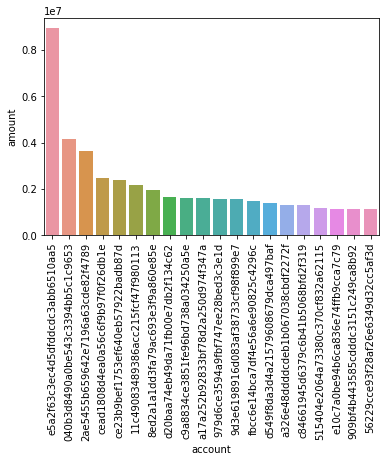

In [50]:
#groupbyacc = spend.groupby(['account'],sort=True)['amount'].sum().reset_index()
#print groupbyacc.head()
np.set_printoptions(suppress=False)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
print groupbyacc.sort_values('amount',ascending=False).head(5)
print groupbyacc.describe()
sns.barplot(x = 'account',y='amount',data=groupbyacc.sort_values('amount',ascending=False).head(20))
plt.xticks(Rotation= 'vertical')
#sns.barplot(x='account',y = 'amount', data = groupbyacc)

#### Total Monthly spending 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

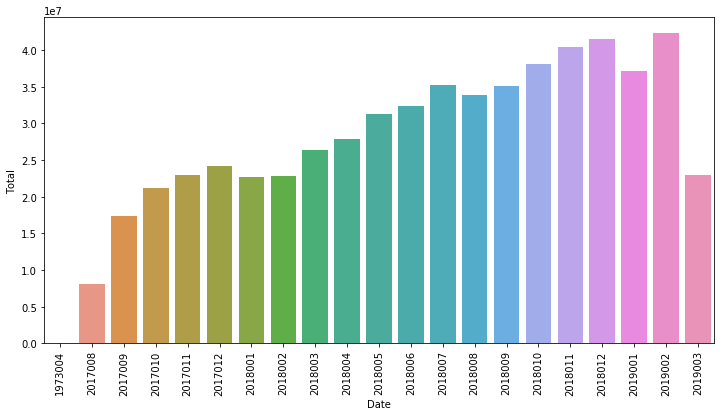

In [406]:
groupbydate = spend.groupby(['year_month'],sort=True)['amount'].sum().reset_index()
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
groupbydate.columns = ["Date","Total"]

#fig, ax =plt.subplot(1,grp_store_year["Store_new"].nunique(),1)
pv = pd.pivot_table(groupbydate, index=groupbydate.Date, columns=groupbydate.Total,
                   values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.barplot(data=groupbydate, x="Date", y="Total")
plt.xticks(Rotation= 'vertical')


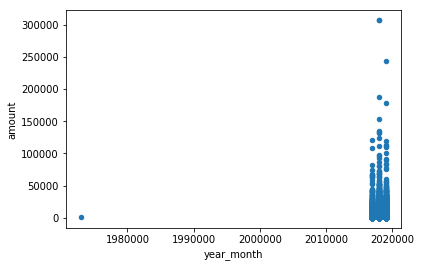

In [84]:
spend.plot(y="amount",x="year_month",kind='scatter')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

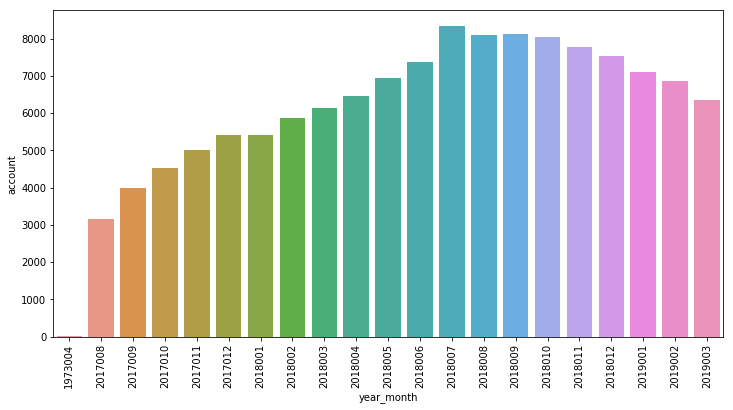

In [91]:
groupbyaccountcount = spend.groupby(['year_month'])['account'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= groupbyaccountcount,x="year_month",y="account",)
plt.xticks(Rotation= 'vertical')

In [95]:
groupbymonthaccount = spend.groupby(['year_month','account'])['amount'].sum().reset_index()
groupbymonthaccount.columns = ['year_month','account','amount']
print groupbymonthaccount.head()
pvv = pd.pivot_table(groupbymonthaccount, index=groupbymonthaccount.account, columns=groupbymonthaccount.year_month,
                   values='amount', aggfunc='sum')
pvv.head()
#plt.figure(figsize=(12,6))
#sns.barplot(data= groupbyaccountcount,x="year_month",y="account",)
#plt.xticks(Rotation= 'vertical')

   year_month                           account   amount
0     1973004  a04e063493c55bc6cecd9056712e9e47  730.070
1     2017008  000b2159adf33dcb44291291e0575122  10.506k
2     2017008  000cff3bf5b20e8bb5734eb0aeef6673   2.673k
3     2017008  00115bed7ec756ccb004660899b6a992  193.773
4     2017008  0013d81cb06a39cc2fc5fb57b2123115   1.152k


year_month,1973004,2017008,2017009,2017010,2017011,2017012,2018001,2018002,2018003,2018004,...,2018006,2018007,2018008,2018009,2018010,2018011,2018012,2019001,2019002,2019003
account,,,,,,,,,,,,,,,,,,,,,
00023fda963eb48839a670cbdf74cd21,NaN,NaN,NaN,NaN,839.150,706.625,111.255,893.436,917.848,NaN,...,NaN,39.524,556.384,5.008k,405.073,2.511k,1.487k,2.712k,1.871k,1.984k
000458145e8ff76fb2907417d806d098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.683,1.193k,1.699k,...,1.272k,2.478k,593.378,497.734,1.375k,2.019k,2.535k,4.671k,1.277k,899.158
000b2159adf33dcb44291291e0575122,NaN,10.506k,19.340k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000cff3bf5b20e8bb5734eb0aeef6673,NaN,2.673k,2.110k,4.519k,7.536k,8.764k,14.422k,9.382k,17.029k,16.799k,...,10.474k,8.704k,10.045k,11.230k,15.203k,9.330k,11.444k,379.010,NaN,NaN
000f6054933c882efb96bc34b91c8924,NaN,NaN,NaN,NaN,236.117,26.519,69.626,NaN,599.241,411.273,...,820.885,784.981,785.364,1.083k,1.478k,716.021,343.746,2.417k,2.219k,2.131k


In [ ]:
groupbycount = count.groupby('')

In [116]:
#df = pd.merge(spend,count,how='outer')#, left_on=['account','new_date'], right_on = ['account','date'])
#print df.head()
print df.isnull().sum()
df = df.fillna(0)
print df.head()
print df.isnull().sum()

account         0
amount          3
new_date        0
new_time        3
count         110
year            0
month           0
day             0
quarter         0
year_month      0
dtype: int64
                            account   amount    new_date  new_time    count  \
0  5e0a5eb5575517efdddb2799c90e2e9b   15.144  2017-08-16  00:00:00   56.000   
1  a04e063493c55bc6cecd9056712e9e47  730.070  1973-04-05  07:06:40    0.000   
2  ff6cc8cadcb7457f9ddb2dd238a13733   3.651k  2017-08-16  00:00:00  432.000   
3  324a05f1f917b8a0af83a54e55a1ef63  113.219  2017-08-16  00:00:00   50.000   
4  b9abff45dc08172b556cb10b7c3c2252  697.224  2017-08-16  00:00:00  135.000   

   year  month  day  quarter  year_month  
0  2017      8   16        3     2017008  
1  1973      4    5        2     1973004  
2  2017      8   16        3     2017008  
3  2017      8   16        3     2017008  
4  2017      8   16        3     2017008  
account       0
amount        0
new_date      0
new_time      0
count     

In [106]:
df["year"] = pd.DatetimeIndex(df["new_date"]).year
df["month"] = pd.DatetimeIndex(df["new_date"]).month
df["day"] = pd.DatetimeIndex(df["new_date"]).day
df["quarter"] = pd.DatetimeIndex(df["new_date"]).quarter
df["year_month"] = df['new_date'].map(lambda x: 1000*x.year + x.month)
df.head()

,account,amount,new_date,new_time,count,year,month,day,quarter,year_month
0,5e0a5eb5575517efdddb2799c90e2e9b,15.144,2017-08-16,00:00:00,56.000,2017,8,16,3,2017008
1,a04e063493c55bc6cecd9056712e9e47,730.070,1973-04-05,07:06:40,NaN,1973,4,5,2,1973004
2,ff6cc8cadcb7457f9ddb2dd238a13733,3.651k,2017-08-16,00:00:00,432.000,2017,8,16,3,2017008
3,324a05f1f917b8a0af83a54e55a1ef63,113.219,2017-08-16,00:00:00,50.000,2017,8,16,3,2017008
4,b9abff45dc08172b556cb10b7c3c2252,697.224,2017-08-16,00:00:00,135.000,2017,8,16,3,2017008


In [166]:
df["year_quarter"] = pd.DatetimeIndex(df["new_date"]).map(lambda x: 1000*x.year + x.quarter)

In [167]:
print df.describe()

         amount   count      year   month     day  quarter  year_month  \
count    1.934M  1.934M    1.934M  1.934M  1.934M   1.934M      1.934M   
mean    301.837  41.456    2.018k   6.874  15.717    2.616      2.018M   
std      1.122k  74.993  551.689m   3.722   8.837    1.199     549.333   
min       0.000   0.000    1.973k   1.000   1.000    1.000      1.973M   
25%      15.327  15.000    2.018k   3.000   8.000    1.000      2.018M   
50%      66.134  24.000    2.018k   7.000  16.000    3.000      2.018M   
75%     234.994  44.000    2.018k  10.000  23.000    4.000      2.018M   
max    307.370k  5.643k    2.019k  12.000  31.000    4.000      2.019M   

       year_quarter  
count        1.934M  
mean         2.018M  
std         550.939  
min          1.973M  
25%          2.018M  
50%          2.018M  
75%          2.018M  
max          2.019M  


In [169]:
df.head(1)

,account,amount,new_date,new_time,count,year,month,day,quarter,year_month,year_quarter
0,5e0a5eb5575517efdddb2799c90e2e9b,15.144,2017-08-16,00:00:00,56.000,2017,8,16,3,2017008,2017003
1,a04e063493c55bc6cecd9056712e9e47,730.070,1973-04-05,07:06:40,0.000,1973,4,5,2,1973004,1973002
2,ff6cc8cadcb7457f9ddb2dd238a13733,3.651k,2017-08-16,00:00:00,432.000,2017,8,16,3,2017008,2017003
3,324a05f1f917b8a0af83a54e55a1ef63,113.219,2017-08-16,00:00:00,50.000,2017,8,16,3,2017008,2017003
4,b9abff45dc08172b556cb10b7c3c2252,697.224,2017-08-16,00:00:00,135.000,2017,8,16,3,2017008,2017003


#### AMOUNT:
##### There is large difference between mean and median for amount feature. Which is kind of expected and which shows that amount data is not normailly distributed. There looks to be large difference between min and max values.  -ve value can be a outlier for current scenario.

#### COUNT:
##### Counts seems to be normally distributed with few outliers.



(array([  1.93309800e+06,   8.19000000e+02,   1.43000000e+02,
          3.00000000e+01,   1.70000000e+01,   9.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00]),
 array([      0.        ,   15368.52288498,   30737.04576995,
          46105.56865493,   61474.0915399 ,   76842.61442488,
          92211.13730985,  107579.66019483,  122948.1830798 ,
         138316.70596478,  153685.22884975,  169053.75173473,
         184422.2746197 ,  199790.79750468,  215159.32038966,
         230527.84327463,  245896.36615961,  261264.88904458,
         276633.41192956,  292001.93481453,  307370.45769951]),
 <a list of 20 Patch objects>)

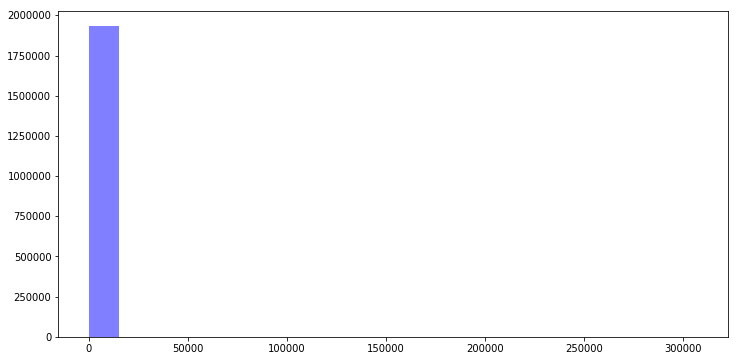

In [407]:
plt.figure(figsize=(12,6))
plt.hist(df.amount, 20, facecolor='blue', alpha=0.5)

##### Removing negative value from data

In [311]:
model_df = pd.DataFrame()
model_df["avg_amount"] = df.groupby("account")['amount'].mean()
model_df.head()

,avg_amount
account,
00023fda963eb48839a670cbdf74cd21,261.877
000458145e8ff76fb2907417d806d098,152.247
000b2159adf33dcb44291291e0575122,678.304
000cff3bf5b20e8bb5734eb0aeef6673,360.440
000f6054933c882efb96bc34b91c8924,77.269


In [312]:
#model_df = model_df.set_index("account",inplace=True)
account_start_date = pd.DataFrame()
account_end_date = pd.DataFrame()
account_avg_transaction = pd.DataFrame()
account_total_active_days = pd.DataFrame()
account_start_date["start_date"] = df.groupby("account")['new_date'].min()
model_df = model_df.join(account_start_date)
account_end_date["end_date"] = df.groupby("account")['new_date'].max()
model_df = model_df.join(account_end_date)
account_avg_transaction["avg_transaction"] = df.groupby("account")['count'].mean()
model_df = model_df.join(account_avg_transaction)
account_total_active_days['active_days'] = df.groupby("account")['new_date'].count()
model_df = model_df.join(account_total_active_days)
model_df.head()


,avg_amount,start_date,end_date,avg_transaction,active_days
account,,,,,
00023fda963eb48839a670cbdf74cd21,261.877,2017-11-26,2019-03-14,16.364,77
000458145e8ff76fb2907417d806d098,152.247,2018-02-15,2019-03-15,23.611,144
000b2159adf33dcb44291291e0575122,678.304,2017-08-16,2017-09-28,219.000,44
000cff3bf5b20e8bb5734eb0aeef6673,360.440,2017-08-16,2019-01-02,65.188,485
000f6054933c882efb96bc34b91c8924,77.269,2017-11-09,2019-03-15,22.120,200


In [313]:
del account_start_date ,account_end_date ,account_avg_transaction,account_total_active_days

In [315]:
#model_df['days_seen_last_transaction'] = df.new_date.max() - model_df['end_date']
model_df['days_seen_last_transaction'] = model_df['days_seen_last_transaction'].dt.days
model_df.drop(["days_seen_last_tran"],inplace=True,axis=1)

In [317]:
model_df["risky_by_last_activity"]=model_df.apply(lambda x: 1 if x["days_seen_last_transaction"]> 120 else 0, axis=1)
print model_df.head()
print model_df.risky_by_last_activity.sum()

                                  avg_amount  start_date    end_date  \
account                                                                
00023fda963eb48839a670cbdf74cd21     261.877  2017-11-26  2019-03-14   
000458145e8ff76fb2907417d806d098     152.247  2018-02-15  2019-03-15   
000b2159adf33dcb44291291e0575122     678.304  2017-08-16  2017-09-28   
000cff3bf5b20e8bb5734eb0aeef6673     360.440  2017-08-16  2019-01-02   
000f6054933c882efb96bc34b91c8924      77.269  2017-11-09  2019-03-15   

                                  avg_transaction  active_days  \
account                                                          
00023fda963eb48839a670cbdf74cd21           16.364           77   
000458145e8ff76fb2907417d806d098           23.611          144   
000b2159adf33dcb44291291e0575122          219.000           44   
000cff3bf5b20e8bb5734eb0aeef6673           65.188          485   
000f6054933c882efb96bc34b91c8924           22.120          200   

                                

##### Quarterly avarage count and no of active days per quarter count

In [255]:
account_start_date = df.groupby(["account","year_quarter"])['count'].sum().reset_index()
account_start_date.columns = ["account","year_quarter","avg_transaction"]
account_start_date= pd.pivot_table(data=account_start_date,index=account_start_date.account,columns=account_start_date.year_quarter,
                                  values='avg_transaction',aggfunc='mean' )
account_start_date.fillna(0,inplace=True)

account_start_date.head()



year_quarter,1973002,2017003,2017004,2018001,2018002,2018003,2018004,2019001
account,,,,,,,,
00023fda963eb48839a670cbdf74cd21,0.000,0.000,84.000,140.000,28.000,126.000,364.000,518.000
000458145e8ff76fb2907417d806d098,0.000,0.000,0.000,153.000,595.000,561.000,1.037k,1.054k
000b2159adf33dcb44291291e0575122,0.000,9.636k,0.000,0.000,0.000,0.000,0.000,0.000
000cff3bf5b20e8bb5734eb0aeef6673,0.000,1.056k,4.704k,5.152k,6.720k,4.992k,8.912k,80.000
000f6054933c882efb96bc34b91c8924,0.000,0.000,84.000,126.000,980.000,952.000,1.036k,1.246k


##### Risk calculation by avg transaction count decrease by quarter

In [256]:

risky_avg_transaction = []
for idx,row in account_start_date.iterrows():
    if  (row[2017004] > row[2018001] ) & (row[2018001] > row[2018002] ) & (row[2018002] > row[2018003] ) & (row[2018003] > row[2018004] ) & (row[2018004] > row[2019001] )   :
        risky_avg_transaction.append(idx)
        
print len(risky_avg_transaction)
account_start_date =account_start_date.reset_index()
account_start_date["risky_by_avg_tran"] = map(lambda x: 1 if x in (risky_avg_transaction)  else 0,account_start_date.account)
account_start_date[account_start_date["risky_by_avg_tran"]>0]
account_start_date.set_index("account",inplace=True)

       

41


In [257]:
account_active_days_q = df.groupby(["account","year_quarter"])['new_date'].count().reset_index()
account_active_days_q.columns = ["account","year_quarter","active_days_q"]
account_active_days_q= pd.pivot_table(data=account_active_days_q,index=account_active_days_q.account,columns=account_active_days_q.year_quarter,
                                  values='active_days_q',aggfunc='sum' )
account_active_days_q.fillna(0,inplace=True)


##### Risk calculation by id avg active days count decrease by quarter

In [258]:
risky_avg_active_days = []
for idx,row in account_active_days_q.iterrows():
    if  (row[2017004] > row[2018001] ) & (row[2018001] > row[2018002] ) & (row[2018002] > row[2018003] ) & (row[2018003] > row[2018004] ) & (row[2018004] > row[2019001] )   :
        risky_avg_active_days.append(idx)
        
print len(risky_avg_active_days)
account_active_days_q =account_active_days_q.reset_index()
account_active_days_q["risky_by_avg_active_days"] = map(lambda x: 1 if x in (risky_avg_active_days)  else 0,account_active_days_q.account)
account_active_days_q.set_index("account",inplace=True)

35


In [260]:
account_active_amount_q = df.groupby(["account","year_quarter"])['amount'].sum().reset_index()
account_active_amount_q.columns = ["account","year_quarter","active_amount_q"]
account_active_amount_q= pd.pivot_table(data=account_active_amount_q,index=account_active_amount_q.account,columns=account_active_amount_q.year_quarter,
                                  values='active_amount_q',aggfunc='mean' )
account_active_amount_q.fillna(0,inplace=True)


##### Risk calculation by avg amount decrease by quarter

In [262]:
risky_avg_amount = []
for idx,row in account_active_amount_q.iterrows():
    if  (row[2017004] > row[2018001] ) & (row[2018001] > row[2018002] ) & (row[2018002] > row[2018003] ) & (row[2018003] > row[2018004] ) & (row[2018004] > row[2019001] )   :
        risky_avg_amount.append(idx)
        
print len(risky_avg_amount)
account_active_amount_q =account_active_amount_q.reset_index()
account_active_amount_q["risky_by_avg_amount"] = map(lambda x: 1 if x in (risky_avg_amount)  else 0,account_active_amount_q.account)
account_active_amount_q.set_index("account",inplace=True)

14


In [264]:
account_active_amount_q.columns = ["1973002_amount", "2017003_amount", "2017004_amount", "2018001_amount", "2018002_amount", "2018003_amount", "2018004_amount","2019001_amount","risky_by_amount"]
account_active_amount_q.drop("1973002_amount",inplace=True,axis=1)
account_active_days_q.columns = ["1973002_days", "2017003_days", "2017004_days", "2018001_days", "2018002_days", "2018003_days", "2018004_days","2019001_days","risky_by_active_days"]
account_active_days_q.drop("1973002_days",inplace=True,axis=1)
account_start_date.columns = ["1973002_avg_tran", "2017003_avg_tran", "2017004_avg_tran", "2018001_avg_tran", "2018002_avg_tran", "2018003_avg_tran", "2018004_avg_tran","2019001_avg_tran","risky_by_avg_trans"]
account_start_date.drop("1973002_avg_tran",inplace=True,axis=1)


In [318]:
account_active_amount_q=account_active_amount_q.join(account_start_date)
print account_active_amount_q.head(1)
account_active_amount_q = account_active_amount_q.join(account_active_days_q)
print account_active_amount_q.head()
model_df = model_df.join(account_active_amount_q)


                                  2017003_amount  2017004_amount  \
account                                                            
00023fda963eb48839a670cbdf74cd21           0.000          1.546k   
000458145e8ff76fb2907417d806d098           0.000           0.000   
000b2159adf33dcb44291291e0575122         29.845k           0.000   
000cff3bf5b20e8bb5734eb0aeef6673          4.783k         20.820k   
000f6054933c882efb96bc34b91c8924           0.000         262.636   

                                  2018001_amount  2018002_amount  \
account                                                            
00023fda963eb48839a670cbdf74cd21          1.923k         121.726   
000458145e8ff76fb2907417d806d098          1.556k          4.022k   
000b2159adf33dcb44291291e0575122           0.000           0.000   
000cff3bf5b20e8bb5734eb0aeef6673         40.833k         42.041k   
000f6054933c882efb96bc34b91c8924         668.867          2.565k   

                                  2018003_amou

In [319]:
model_df.describe()

,avg_amount,avg_transaction,active_days,days_seen_last_transaction,risky_by_last_activity,2017003_amount,2017004_amount,2018001_amount,2018002_amount,2018003_amount,...,2019001_avg_tran,risky_by_avg_trans,2017003_days,2017004_days,2018001_days,2018002_days,2018003_days,2018004_days,2019001_days,risky_by_active_days
count,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,...,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k,10.001k
mean,352.651,35.666,193.394,62.929,207.379m,2.542k,6.821k,7.189k,9.146k,10.420k,...,1.278k,4.100m,7.783,21.844,23.962,31.359,38.105,41.307,29.034,3.500m
std,2.093k,46.044,106.555,109.211,405.450m,12.344k,29.354k,24.056k,29.484k,29.843k,...,3.616k,63.900m,12.746,27.187,25.786,27.481,26.622,28.746,24.280,59.057m
min,5.727,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,88.750,20.042,116.000,0.000,0.000,0.000,0.000,0.000,186.100,1.127k,...,0.000,0.000,0.000,0.000,0.000,4.000,16.000,16.000,0.000,0.000
50%,175.610,25.754,168.000,2.000,0.000,0.000,375.368,1.196k,2.590k,3.823k,...,611.000,0.000,0.000,8.000,17.000,27.000,36.000,42.000,29.000,0.000
75%,332.518,36.100,242.000,86.000,0.000,972.266,4.540k,5.680k,8.035k,9.878k,...,1.504k,0.000,12.000,39.000,41.000,51.000,58.000,65.000,50.000,0.000
max,130.614k,2.212k,578.000,547.000,1.000,499.286k,1.148M,912.049k,1.093M,1.469M,...,228.239k,1.000,46.000,92.000,90.000,91.000,92.000,92.000,74.000,1.000


#### Adding target variable depending upong risk featurs from all risky features

## Equally weighted model
#### In this model I am giving equal weightage to all three risky factors (risky_by_active_days,risky_by_amount,risky_by_avg_trans)
#### So if either of them is true then target account is consider to be risky.

In [328]:
model_df.reset_index(inplace=True)
model_df['target'] = model_df.apply(lambda x: 1 if (x.risky_by_active_days==1) or (x.risky_by_amount==1) or (x.risky_by_avg_trans == 1) or x.risky_by_last_activity == 1 else 0,axis=1)
target = model_df["target"]
model_df.drop(['target'],inplace=True,axis=1)
model_df.head()


In [383]:
target.value_counts()


0    7879
1    2122
Name: target, dtype: int64

## Model Creation

In [390]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 8000 samples.
Testing set has 2001 samples.


### Baseline model

#### Naive predictor considering model predicated all account risky accounts.

In [333]:
TP = np.sum(target) # Counting the ones as this is the naive case. 

FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
print TP,FP
# TODO: Calculate accuracy, precision and recall

accuracy = float(TP)/float(target.count())
recall = 1
precision = accuracy
beta= 0.5


# The formula for fbeta score can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = (1 + 0.25) * (precision * recall) / ((0.25 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

2122 7879
Naive Predictor: [Accuracy score: 0.2122, F-score: 0.2519]


##### Building a train predictor to compare multiple models
### Here metrics that I am going to use to compare different models is F1 score, accuracy 

In [337]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_recall_curve,confusion_matrix
from sklearn import cross_validation, metrics
import visuals as vs
import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
  
    start = time.time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    
    results['train_time'] = end - start
    
    start = time.time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time.time()
    
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train, predictions_train, 0.5,average='weighted')
        
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5,average='weighted')
    matrix =  confusion_matrix(y_test, predictions_test)
    TP =  matrix[0][0]
    FP = matrix[0][1]  # Specific to the naive case

    TN = matrix[1][1] # No predicted negatives in the naive case
    FN = matrix[1][0] # No predicted negatives in the naive case

    # TODO: Calculate accuracy, precision and recall
    accuracy = metrics.accuracy_score(y_test, predictions_test)
    recall = float(TP )/  float(TP + FN)
    precision = float(TP )/ float(TP + FP)
    #print "precision: {}, recall: {}".format(recall, precision) 
    beta = 0.5
    
    # TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
    # HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    fscore = (1 + 0.25) * (precision * recall) / ((0.25 * precision) + recall)
    print "Test fscore with beta 0.5 : ", fscore   
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    dataframe = pd.DataFrame(predictions_train,y_train)  
    dataframe.to_csv(learner.__class__.__name__+".txt")
    # Return the results
    return results

Test fscore with beta 0.5 :  0.974649273936
LogisticRegressionCV trained on 80 samples.
Test fscore with beta 0.5 :  0.98071931776
LogisticRegressionCV trained on 800 samples.
Test fscore with beta 0.5 :  0.98071931776
LogisticRegressionCV trained on 8000 samples.
Test fscore with beta 0.5 :  0.961397954213
KNeighborsClassifier trained on 80 samples.
Test fscore with beta 0.5 :  0.95799876467
KNeighborsClassifier trained on 800 samples.
Test fscore with beta 0.5 :  0.960871718673
KNeighborsClassifier trained on 8000 samples.
Test fscore with beta 0.5 :  0.9988914891
RandomForestClassifier trained on 80 samples.
Test fscore with beta 0.5 :  0.999630223099
RandomForestClassifier trained on 800 samples.
Test fscore with beta 0.5 :  1.0
RandomForestClassifier trained on 8000 samples.


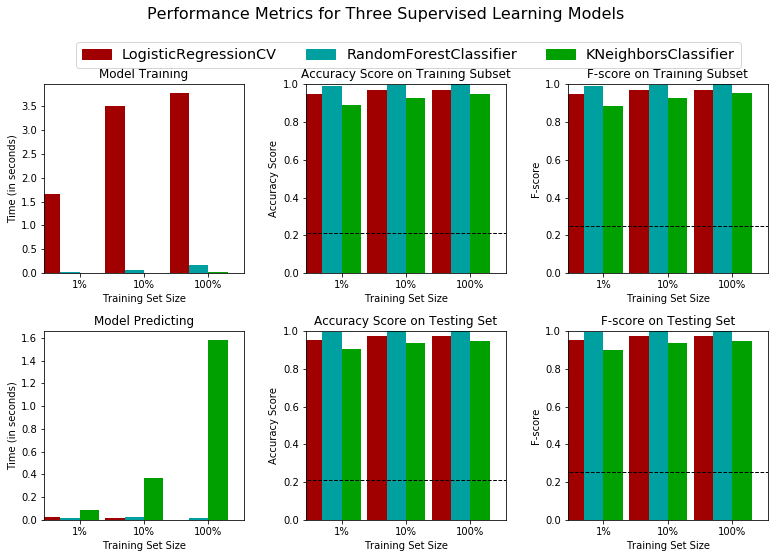

In [392]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# TODO: Initialize the three models
clf_A =  linear_model.LogisticRegressionCV(solver='lbfgs',random_state=40)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=40)
#clf_D = RandomForestClassifier(random_state = 40)

samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results[clf_name][i]=train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

####  Looking at the graph I can say Randomforest is performing well on testing set. It outperfrom other two model in all the sample cases. With High accuracy and high FScore I choose Randomforest as best model. Also if you see at training time requried out of three models KNeighborsClassifier take highest time so training time wise also Randomforest is performing better.

In [391]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_split=117,min_samples_leaf=3,max_leaf_nodes=52)

k = np.arange(20)+1
parameters = {
              "max_leaf_nodes": np.arange(2,60,5),
              #"n_estimators": np.arange(2, 300, 2),
              #"max_depth": np.arange(1, 28, 1),
              #"min_samples_split": np.arange(2,150,1),
              #"min_samples_leaf": np.arange(1,60,1),
              #"max_leaf_nodes": np.arange(2,60,1),
              #"min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}
             }

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5,average='weighted')

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = clf.fit(X_train,y_train)

# Get the estimator
#best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
#best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores

print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='weighted'))


Optimized Model
------
Final accuracy score on the testing data: 0.9985
Final F-score on the testing data: 0.9985


#### Tuned model is not improving any score or accuracy 

In [393]:
import pickle
filename= "RandomForest_equally_weighted_model.sav"
pickle.dump(clf_C,open(filename,"wb"))

### Feature Importance 

Feature ranking:
1. feature days_seen_last_transaction (0.246365)
2. feature risky_by_last_activity (0.220689)
3. feature 2019001_days (0.110422)
4. feature 2019001_avg_tran (0.093649)
5. feature 2019001_amount (0.090252)
6. feature 2018004_days (0.064807)
7. feature 2018004_amount (0.062413)
8. feature 2018004_avg_tran (0.059789)
9. feature 2018003_days (0.009692)
10. feature 2018003_avg_tran (0.009351)
11. feature risky_by_avg_trans (0.006698)
12. feature risky_by_active_days (0.005558)
13. feature 2018003_amount (0.004926)
14. feature 2017004_amount (0.003594)
15. feature 2017003_avg_tran (0.002269)
16. feature 2017003_amount (0.001406)
17. feature 2018001_amount (0.001257)
18. feature 2017003_days (0.001203)
19. feature 2017004_avg_tran (0.001080)
20. feature 2018001_days (0.000874)
21. feature risky_by_amount (0.000707)
22. feature 2018001_avg_tran (0.000695)
23. feature active_days (0.000555)
24. feature 2017004_days (0.000464)
25. feature 2018002_amount (0.000346)
26. feature 20

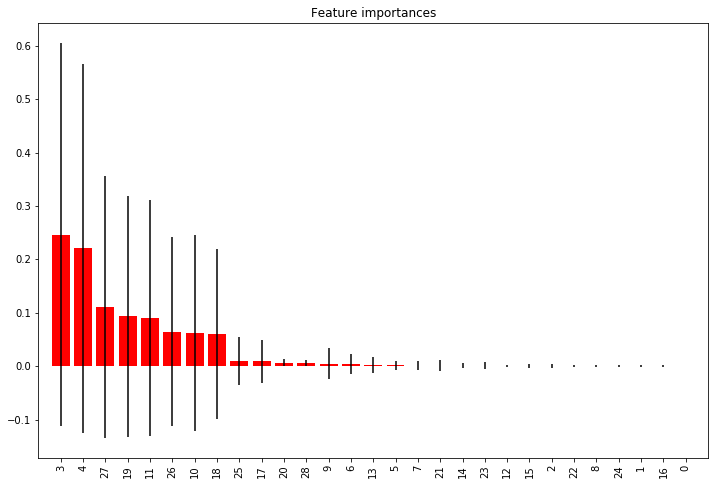

In [346]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
probabilities = clf.predict_proba(X_test)[:, 1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation='vertical')
plt.show()

##### Below are important features which helps decide which accounts are in risk of churing.
##### 1. feature days_seen_last_transaction (0.246365)
##### 2. feature risky_by_last_activity (0.220689)
##### 3. feature 2019001_days (0.110422)
##### 4. feature 2019001_avg_tran (0.093649)
##### 5. feature 2019001_amount (0.090252)


##### So I belive we have found important features which can point out risky account. But the data is not sufficent to make predications. We need more data to relia on model prediction like demographic information, type of transactions, age of credit card etc.

## Unequel weightage model

### features days since last activity(50%), decreasing trend per quarter for amount(25%) and decreasing trend per quarter for number of transacation(25%)


In [381]:
model_df.drop(["Churn_probability"],inplace=True,axis=1)

In [382]:
Treshold = 0.50
model_df["total_weights"] = model_df["risky_by_last_activity"] * 0.5 + model_df["risky_by_avg_trans"] * 0.25 +  model_df["risky_by_amount"] * 0.25
print model_df.head()
target_unequel_Weight = model_df.apply(lambda x: 1 if x["total_weights"] >= Treshold else 0,axis=1)

target_unequel_Weight.value_counts()     

0    7926
1    2075
dtype: int64

In [410]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_df, 
                                                    target_unequel_Weight, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 8000 samples.
Testing set has 2001 samples.


Test fscore with beta 0.5 :  0.975594800098
LogisticRegressionCV trained on 80 samples.
Test fscore with beta 0.5 :  0.981768908598
LogisticRegressionCV trained on 800 samples.
Test fscore with beta 0.5 :  0.984
LogisticRegressionCV trained on 8000 samples.
Test fscore with beta 0.5 :  0.961165048544
KNeighborsClassifier trained on 80 samples.
Test fscore with beta 0.5 :  0.957995578482
KNeighborsClassifier trained on 800 samples.
Test fscore with beta 0.5 :  0.960281238436
KNeighborsClassifier trained on 8000 samples.
Test fscore with beta 0.5 :  0.999754510863
RandomForestClassifier trained on 80 samples.
Test fscore with beta 0.5 :  1.0
RandomForestClassifier trained on 800 samples.
Test fscore with beta 0.5 :  1.0
RandomForestClassifier trained on 8000 samples.


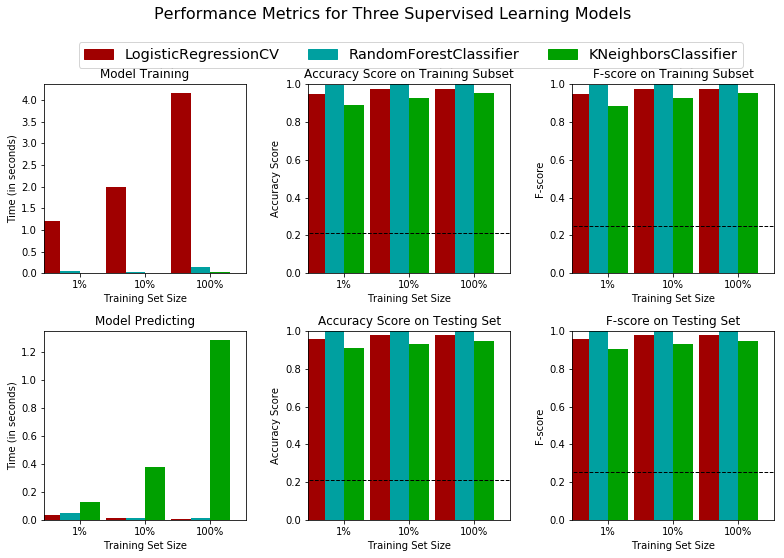

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# TODO: Initialize the three models
clf_A =  linear_model.LogisticRegressionCV(solver='lbfgs',random_state=40)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=40)
#clf_D = RandomForestClassifier(random_state = 40)

samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results[clf_name][i]=train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

Feature ranking:
1. feature 2018004_avg_tran (0.208727)
2. feature total_weights (0.197219)
3. feature days_seen_last_transaction (0.151545)
4. feature risky_by_last_activity (0.093938)
5. feature 2019001_days (0.089488)
6. feature 2019001_amount (0.080306)
7. feature 2018004_days (0.075860)
8. feature 2019001_avg_tran (0.065950)
9. feature 2017004_amount (0.011936)
10. feature 2017003_amount (0.009286)
11. feature 2018004_amount (0.006573)
12. feature 2018003_amount (0.003880)
13. feature 2018003_days (0.002358)
14. feature 2017004_avg_tran (0.000922)
15. feature active_days (0.000451)
16. feature 2018002_amount (0.000400)
17. feature avg_amount (0.000317)
18. feature 2018001_avg_tran (0.000302)
19. feature 2018002_avg_tran (0.000165)
20. feature 2018001_days (0.000123)
21. feature 2017004_days (0.000105)
22. feature risky_by_amount (0.000075)
23. feature 2017003_days (0.000073)
24. feature risky_by_active_days (0.000000)
25. feature 2017003_avg_tran (0.000000)
26. feature 2018003_avg

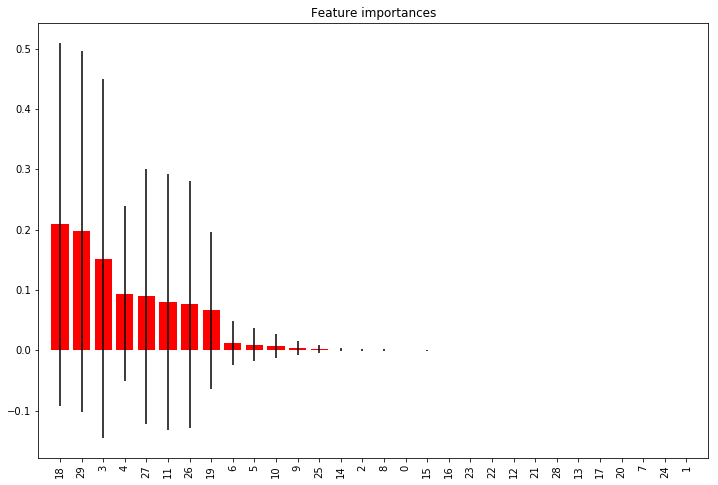

In [412]:
clf = clf_C
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
probabilities = clf.predict_proba(X_test)[:, 1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation='vertical')
plt.show()

#### Below are important features which helps decide which accounts are in risk of churing.¶
#### 1. feature 2018004_avg_tran (0.208727)
#### 2. feature total_weights (0.197219)
#### 3. feature days_seen_last_transaction (0.151545)
#### 4. feature risky_by_last_activity (0.093938)
#### 5. feature 2019001_days (0.089488)
##### So I believe we have found important features which can point out risky account. But the data is not sufficient to make predications. We need more data to rely on model prediction like demographic information, type of transactions, age of credit card etc

### ROC curve to check model accuracy 

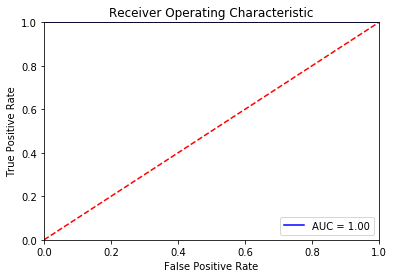

In [413]:
probabilities = clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probabilities)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### With unequel weightage model we are getting perfect score of 1.0 on randomforest model. So model tuning not needed for this.

In [388]:
import pickle
filename= "RandomForest_unweighted_model.sav"
pickle.dump(clf,open(filename,"wb"))

In [401]:
filename= "risky_account.csv"
target.reset_index()
target = pd.DataFrame(target).reset_index()
target.head()
target[target["target"] > 0]["account"].to_csv(filename)

,account,target
0,00023fda963eb48839a670cbdf74cd21,0
1,000458145e8ff76fb2907417d806d098,0
2,000b2159adf33dcb44291291e0575122,1
3,000cff3bf5b20e8bb5734eb0aeef6673,0
4,000f6054933c882efb96bc34b91c8924,0
